In [26]:
import tensorflow as tf
from src.dataset import dataset_tf
from src.audio import to_mfccs_dataset
from src.model import get_seq_model, get_conv_model
from src.plots import plot_history, plot_mfccs

In [27]:
train_ds, val_ds, label_names = dataset_tf("./dataset/queenless")

Found 529 files belonging to 2 classes.
Using 424 files for training.
Using 105 files for validation.
label names: ['no_queen' 'queen']
(TensorSpec(shape=(None, 4000, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Example audio shape: (32, 4000)
Example label shape: (32,)
513 44100
Label: no_queen
Waveform shape: (4000,)
MFCCs shape: (12, 16)
Spectrogram shape: (118, 129, 1)
513 44100
Label: queen
Waveform shape: (4000,)
MFCCs shape: (12, 16)
Spectrogram shape: (118, 129, 1)


In [28]:
train_mfccs_ds = to_mfccs_dataset(train_ds)
val_mfccs_ds = to_mfccs_dataset(val_ds)

513 44100
513 44100


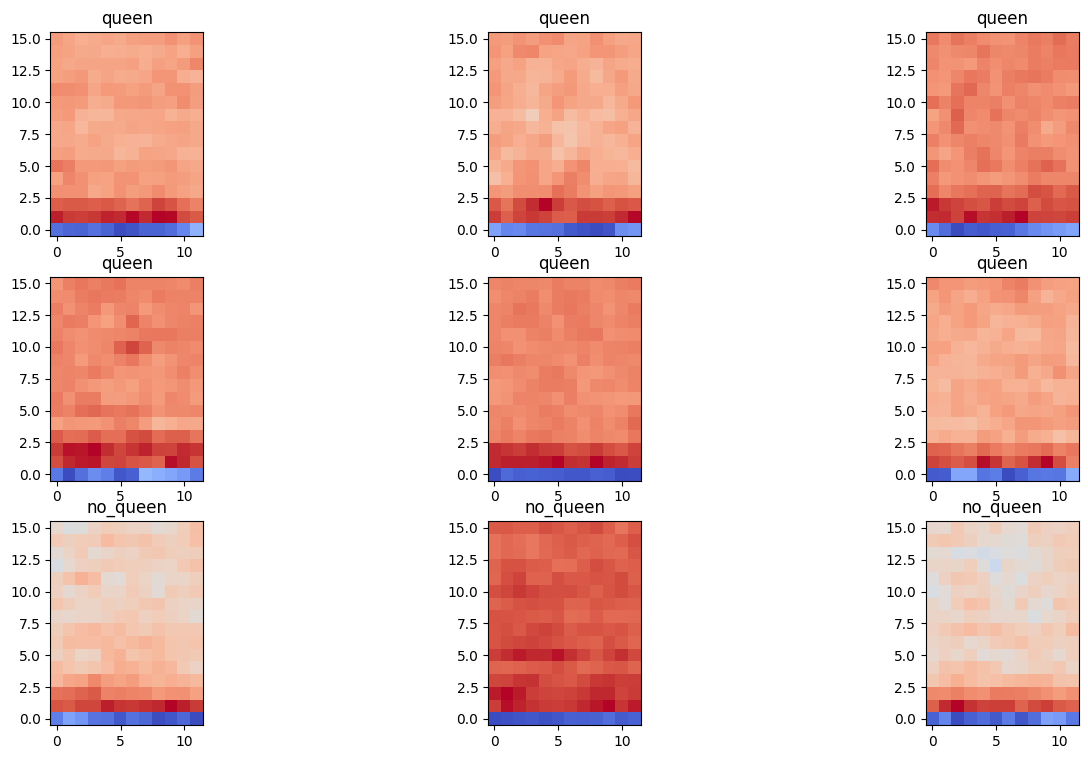

In [29]:
for example_spectrograms, example_spect_labels in train_mfccs_ds.take(1):
  break
# (TensorShape([118, 129, 1])
input_shape = example_spectrograms.shape[1:]
plot_mfccs(example_spectrograms, example_spect_labels, label_names)

In [30]:
train_mfccs_ds = train_mfccs_ds.map(lambda x, y: (tf.expand_dims(x, -1), y))
val_mfccs_ds = val_mfccs_ds.map(lambda x, y: (tf.expand_dims(x, -1), y))
for example_spectrograms, example_spect_labels in train_mfccs_ds.take(1):
  break
input_shape = example_spectrograms.shape[1:]
input_shape

TensorShape([12, 16, 1])

In [31]:
train_mfccs_ds = train_mfccs_ds.cache().shuffle(10000).prefetch(tf.data.AUTOTUNE)
val_mfccs_ds = val_mfccs_ds.cache().prefetch(tf.data.AUTOTUNE)

In [32]:
callbacks = list([
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=6, start_from_epoch=10),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, start_from_epoch=10),
    tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=6, start_from_epoch=10),
])

# Sequential model

In [33]:
model_seq = get_seq_model(input_shape, len(label_names), train_mfccs_ds)
model_seq.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [34]:
history = model_seq.fit(
    train_mfccs_ds,
    validation_data=val_mfccs_ds,
    epochs=50,
    callbacks=callbacks
)

Epoch 1/50


2024-02-28 23:08:18.912655: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


14/14 [==============================] - 1s 44ms/step - loss: 0.5806 - accuracy: 0.6840 - val_loss: 0.3656 - val_accuracy: 0.9048
Epoch 2/50
14/14 [==============================] - 0s 14ms/step - loss: 0.2289 - accuracy: 0.9057 - val_loss: 0.2425 - val_accuracy: 0.8952
Epoch 3/50
14/14 [==============================] - 0s 13ms/step - loss: 0.0756 - accuracy: 0.9788 - val_loss: 0.1783 - val_accuracy: 0.9238
Epoch 4/50
14/14 [==============================] - 0s 13ms/step - loss: 0.0272 - accuracy: 0.9929 - val_loss: 0.4177 - val_accuracy: 0.8857
Epoch 5/50
14/14 [==============================] - 0s 13ms/step - loss: 0.0229 - accuracy: 0.9906 - val_loss: 0.2528 - val_accuracy: 0.9238
Epoch 6/50
14/14 [==============================] - 0s 13ms/step - loss: 0.0096 - accuracy: 0.9976 - val_loss: 0.2168 - val_accuracy: 0.9238
Epoch 7/50
14/14 [==============================] - 0s 13ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.3517 - val_accuracy: 0.8762
Epoch 8/50
14/14 [======

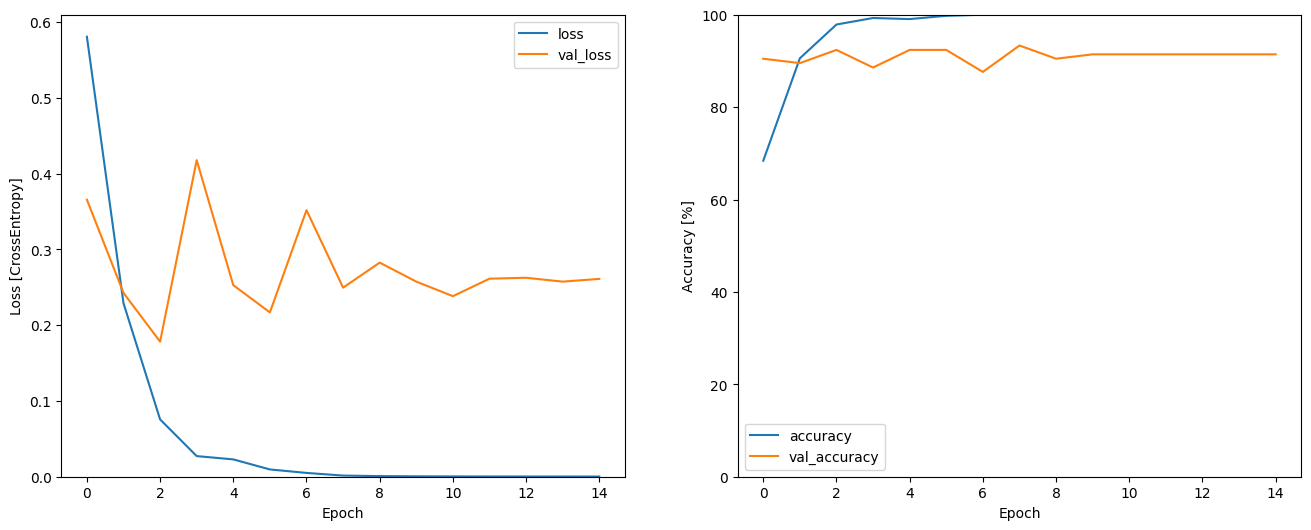

In [35]:
plot_history(history)

# Convolutional

In [ ]:
model_conv = get_conv_model(input_shape, len(label_names))
model_conv.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
history = model_conv.fit(
    train_mfccs_ds, 
    validation_data=val_mfccs_ds, 
    epochs=50,
    callbacks=callbacks
)

In [ ]:
plot_history(history)